In [1]:
from sklearn import datasets
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits() # 手写数字数据集
X = digits.data
y = digits.target
noisy_digits = X + np.random.normal(0, 4, size=X.shape) # 添加噪音
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [3]:
def plot_digits(data):
    """显示示例图片"""
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i in range(10):
        for j in range(10):
            axes[i][j].imshow(data[i*10+j, :].reshape(8, 8),
                    cmap='binary', interpolation='nearest',
                    clim=(0, 16))

    plt.show()

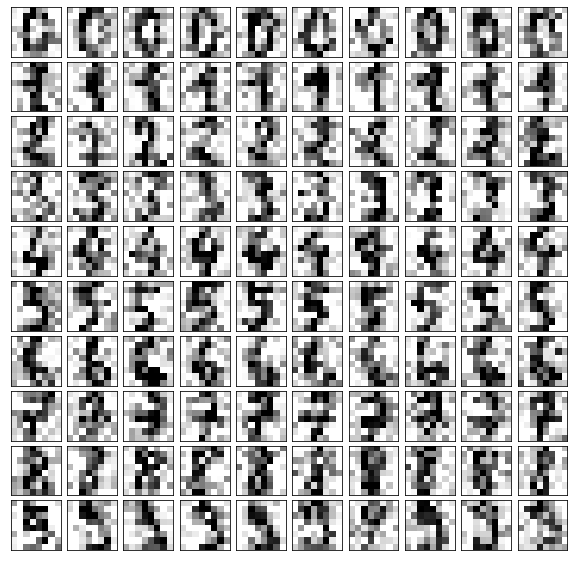

In [4]:
plot_digits(example_digits)

In [5]:
pca = PCA(0.4).fit(noisy_digits)
print(pca.n_features_)
print(pca.n_components_) # 方差贡献率为0.45时pca的主成分个数

64
8


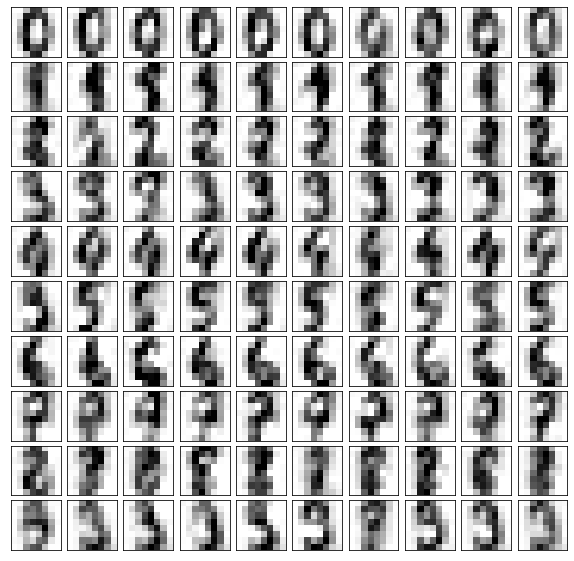

In [6]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components) # Transform data back to its original space
plot_digits(filtered_digits) # 图片清晰度得到上升
